In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ABOUT DATASET
The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#EXPLORE THE DATA

In [ ]:
data.shape

(4240, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


# # DATA PREPROCESSING

###Calculate Missing Values

In [ ]:
data.drop(columns = 'education',inplace = True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df = data

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
glucose,388
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
prevalentHyp,0
prevalentStroke,0
age,0


In [ ]:
#Filling missing values in columns with relevant values
df['glucose'].fillna(df['glucose'].mean(), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace = True) #mode()[0] means: take the first value from that list of modes (the most common one)
df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace = True)
df['totChol'].fillna(df['totChol'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace = True)

/tmp/ipython-input-3466695360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['glucose'].fillna(df['glucose'].mean(), inplace = True)
/tmp/ipython-input-3466695360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

###Data Distriution

**Plot the distribution for all features**

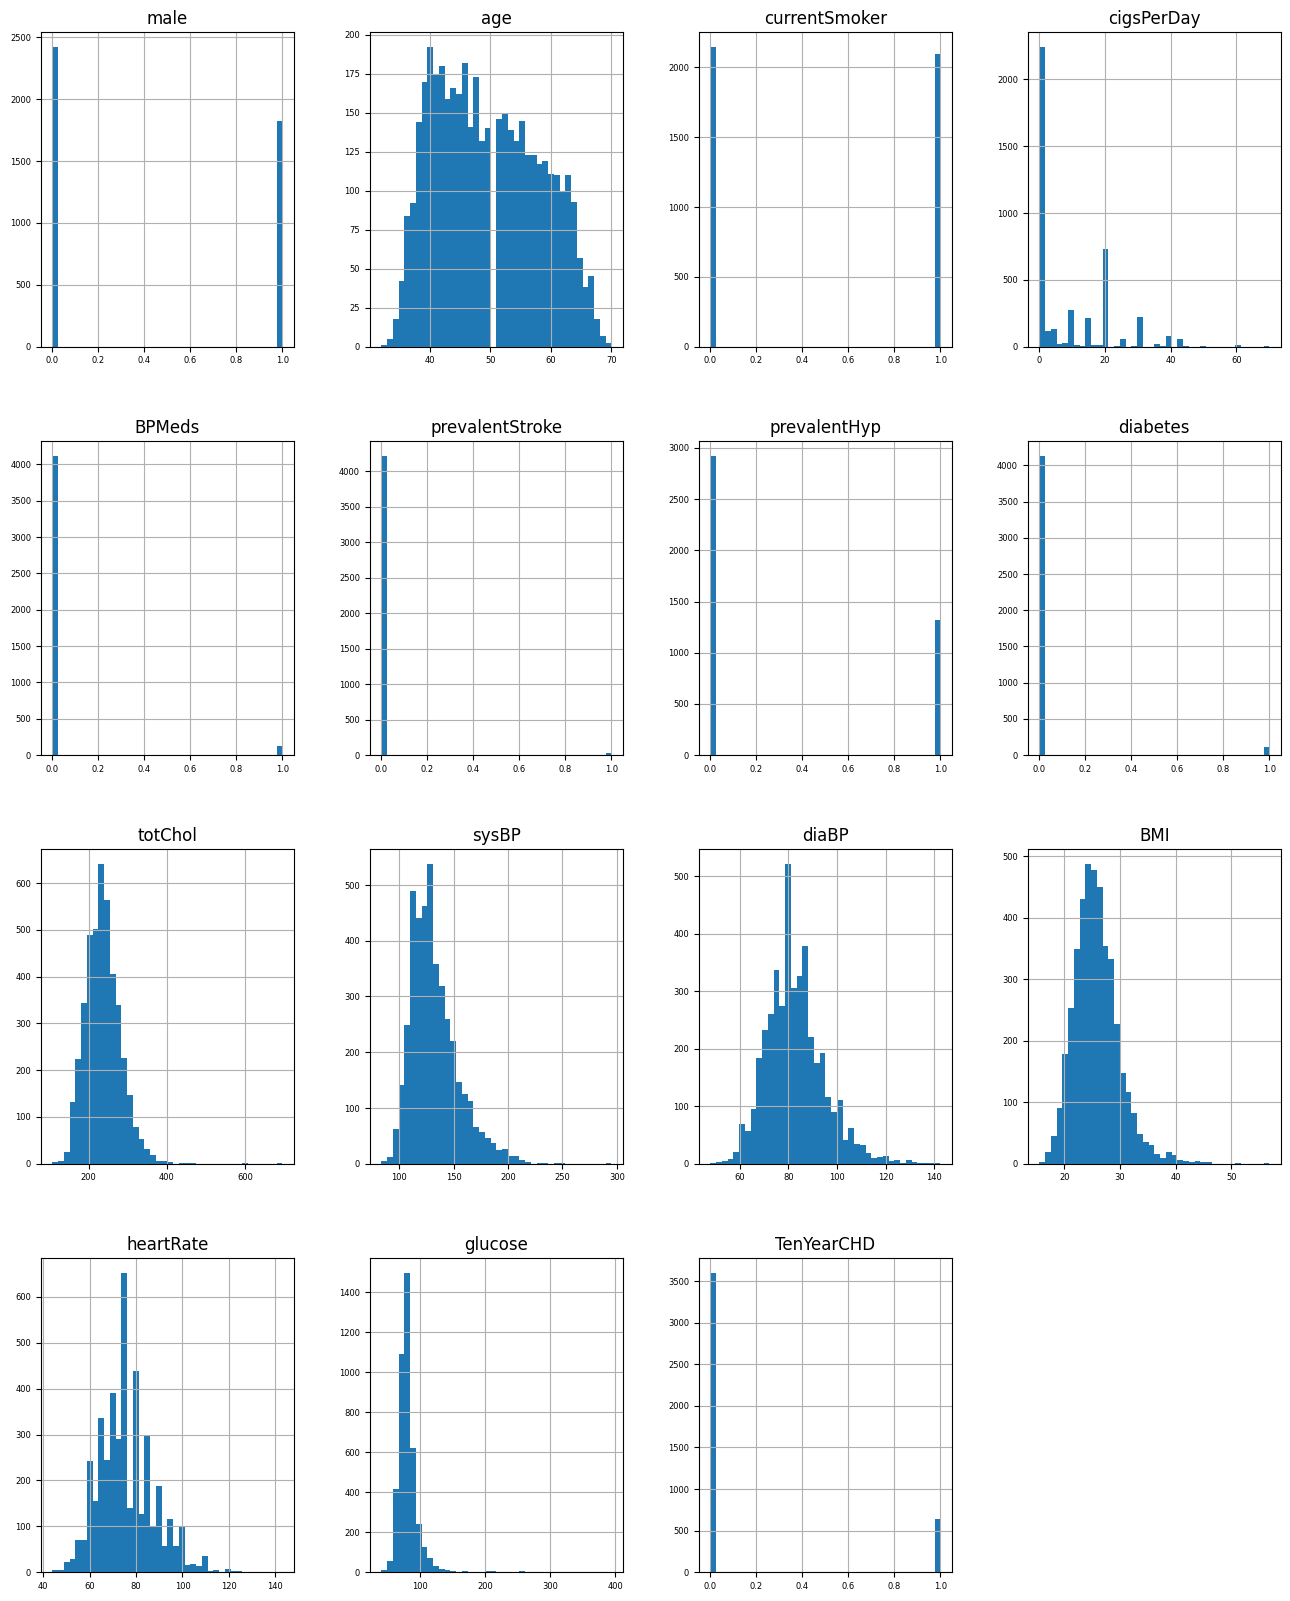

In [ ]:
df.hist(figsize = (16,20), bins = 40, xlabelsize = 6, ylabelsize = 6);

###**Outliers**

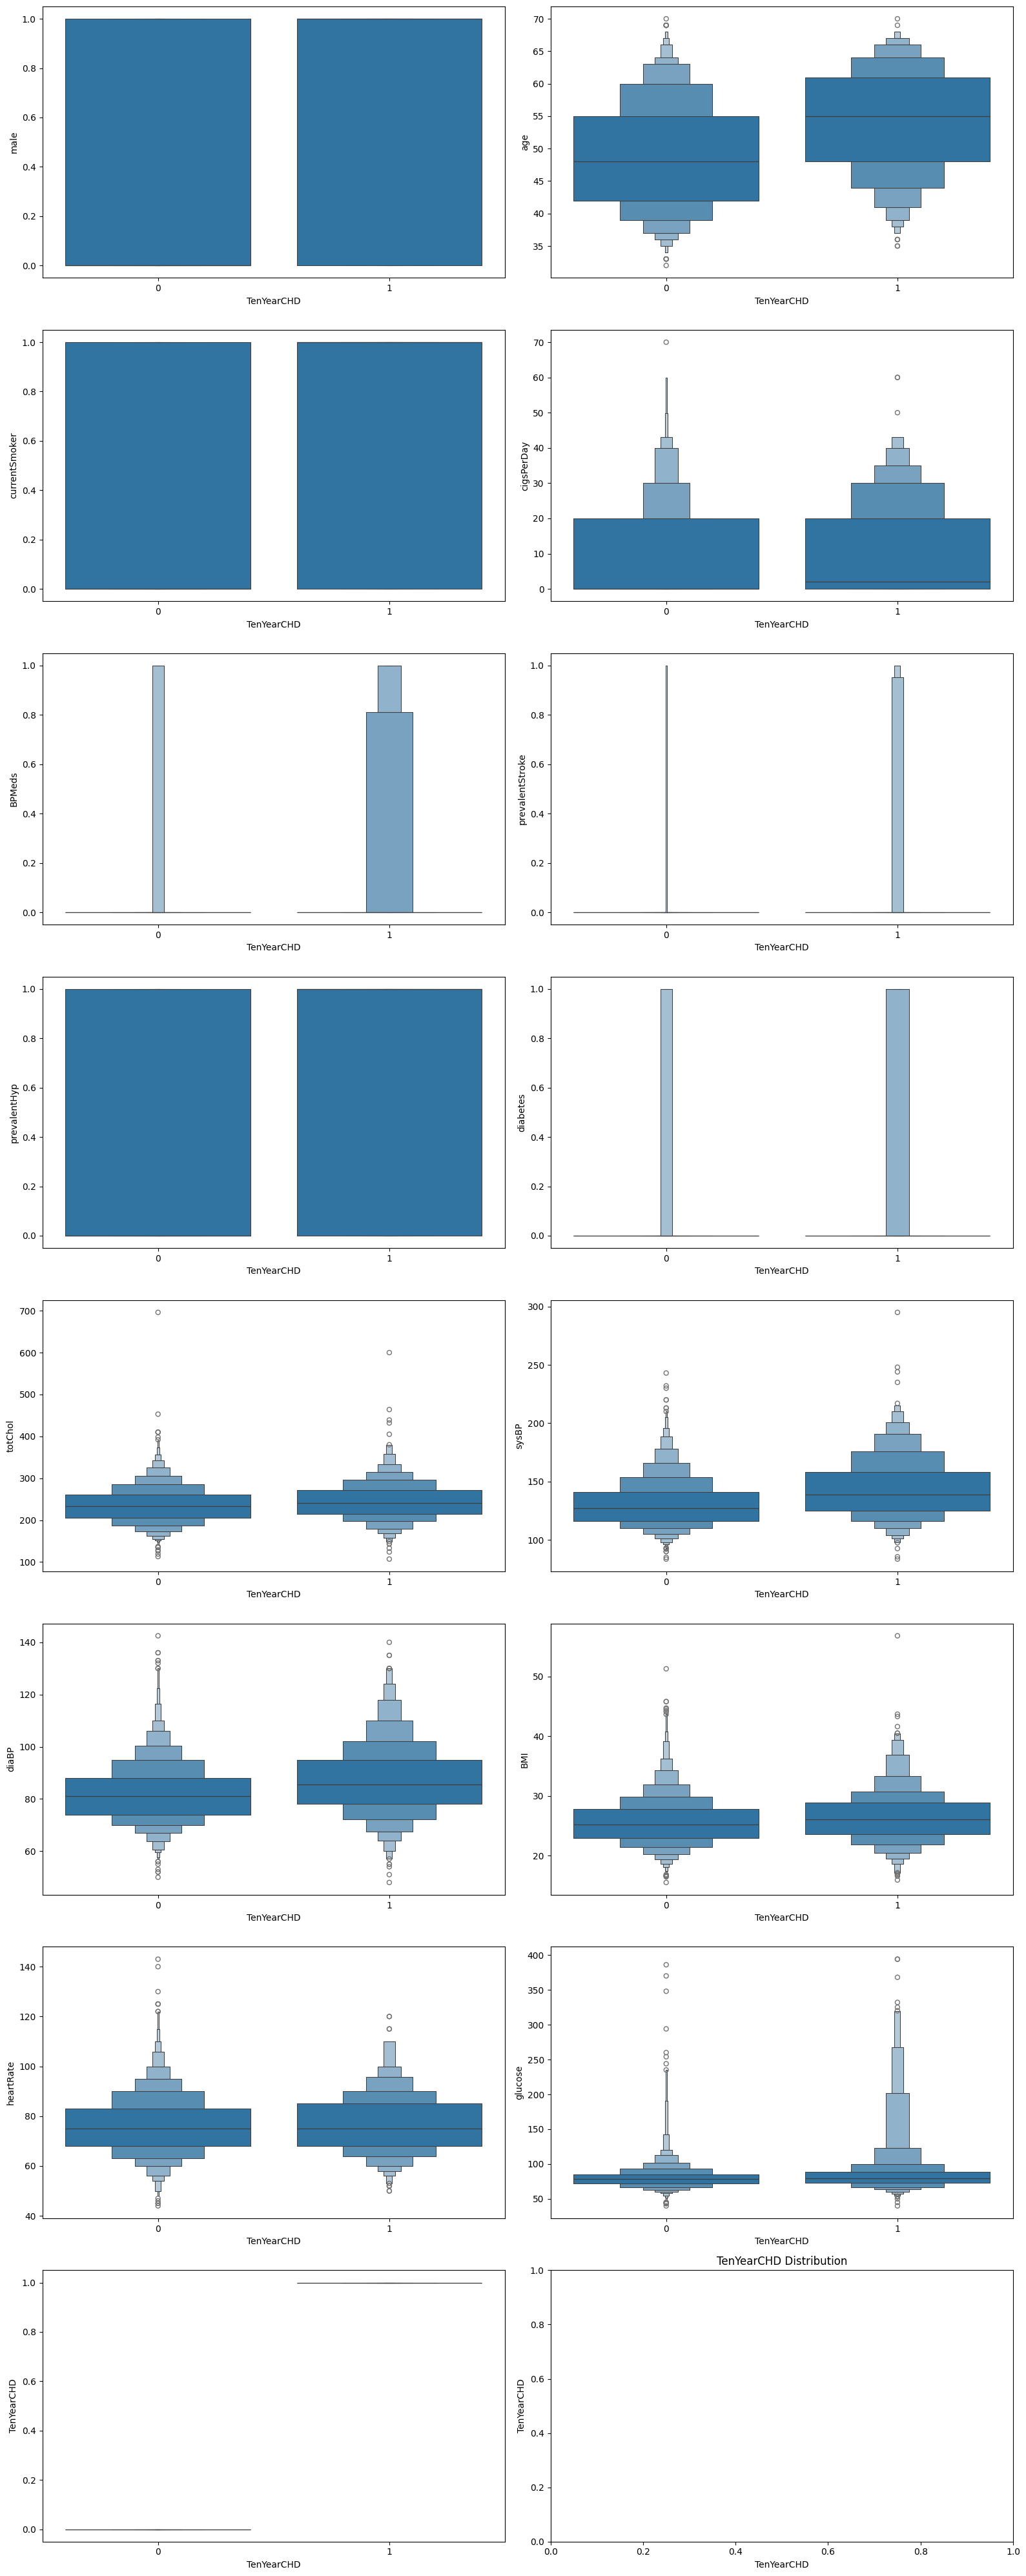

In [ ]:
fig,axes = plt.subplots(nrows = (len(df.columns)+1) // 2,ncols = 2, figsize = (16,40))
for idx,column in enumerate(df): #gives both an index (numbering) and the column name
  row_idx = idx // 2
  col_idx = idx % 2
  sns.boxenplot(x = 'TenYearCHD', y = column, data = df, ax = axes[row_idx,col_idx])
  plt.xlabel('TenYearCHD')
  plt.ylabel(column)
  plt.title(f"{column} Distribution")
  plt.tight_layout();

**There is not much outliers**

#Multicollinearity

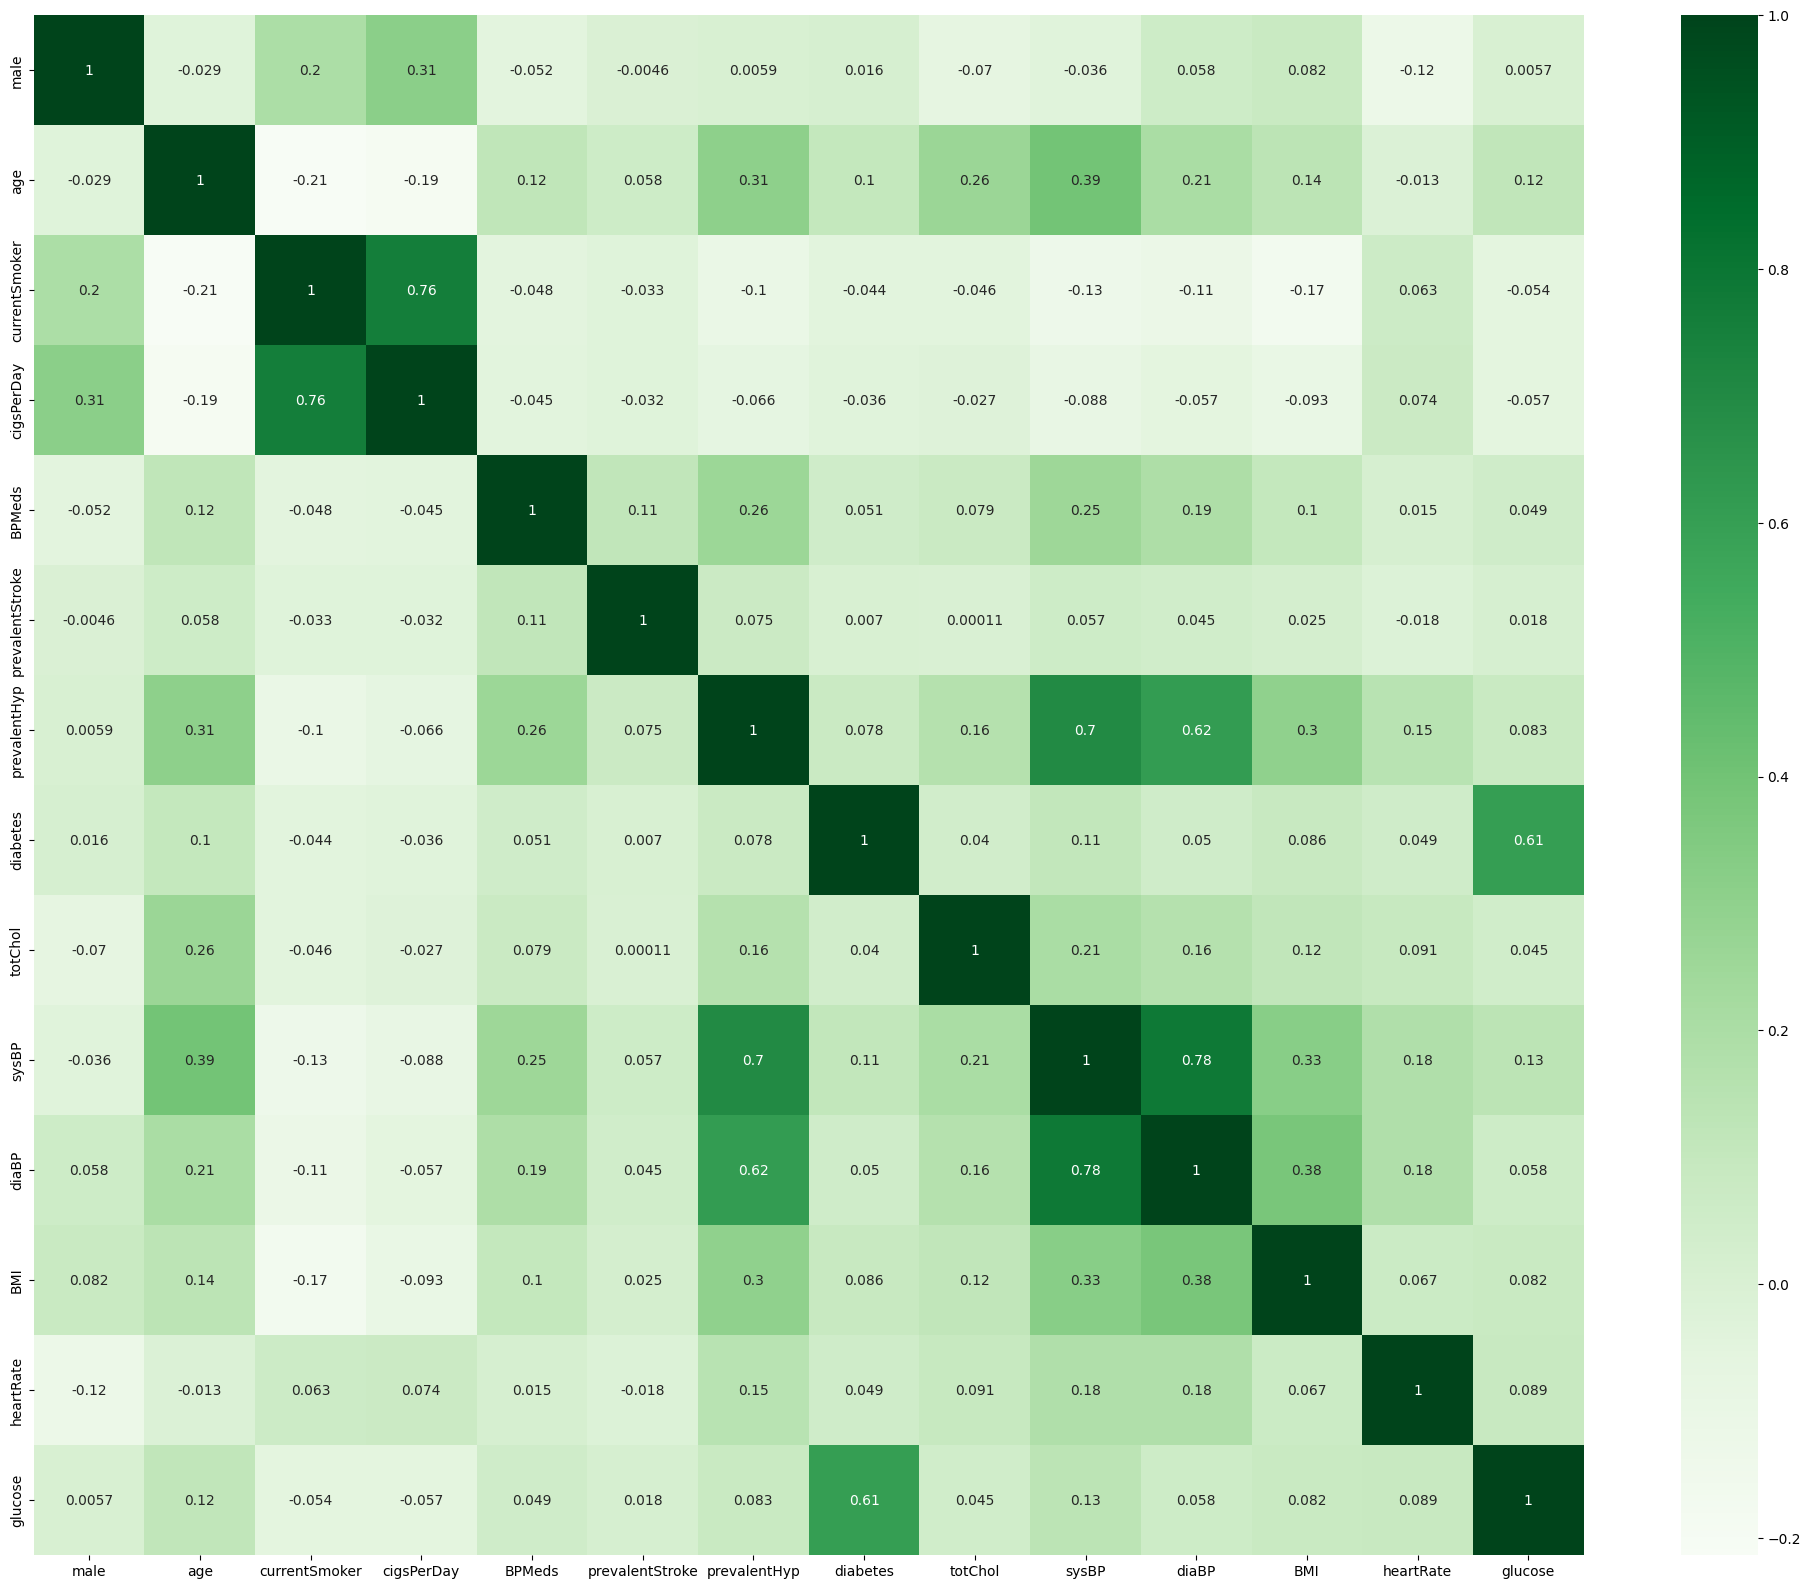

In [ ]:
corr = df.drop(columns = 'TenYearCHD').corr()
fig,ax = plt.subplots(figsize = (25,20))
sns.heatmap(corr,annot = True,cmap = 'Greens',ax = ax);

#Spliting data for train and test

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X = df.drop(columns = ['TenYearCHD'])
target = data['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(X,target,test_size = 0.2,random_state = 42)
print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_test.shape: ",y_test.shape)

x_train.shape:  (3392, 14)
y_train.shape:  (3392,)
x_test.shape:  (848, 14)
y_test.shape:  (848,)


#**Logistic Regression Model**

In [ ]:
# LR_model = make_pipeline(
#      SimpleImputer(strategy='mean),
#      MinMaxScaler(),
#      LogisticRegression()
# )
# LR_model.fit(x_train,y_train)

# Applying MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Intializing and fitting the Logistic Regression Model
LR_model = LogisticRegression()
LR_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(x_train_scaled)
y_testing_pred = LR_model.predict(x_test_scaled)

# get accuracy for training and testing data
training_acc = accuracy_score(y_train,y_training_pred)
testing_acc = accuracy_score(y_test,y_testing_pred)

print(f"Training accuracy: {training_acc:.4f}")
print(f"Testing accuracy: {testing_acc:.4f}")

Training accuracy: 0.8552
Testing accuracy: 0.8585


#Confusion Matrix

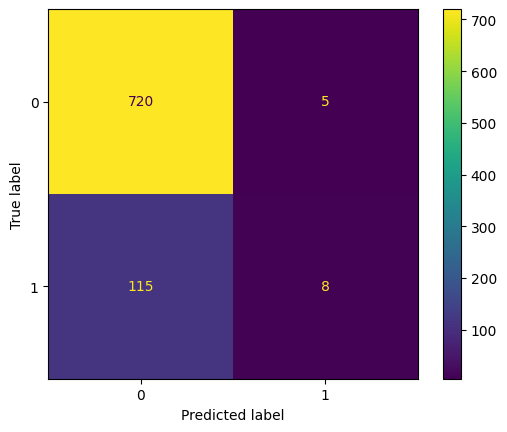

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR_model,x_test_scaled,y_test)

In [ ]:
(720+8)/(720+5+115+8)

0.8584905660377359

In [ ]:
print(classification_report(y_test, LR_model.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.62      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.74      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848



#CONCLUSION
Our current logistic regression achieves 86% accuracy, but it mostly predicts healthy patients correctly. It fails to detect high-risk patients, so accuracy is misleading. We need to improve recall for class 1.”

In [ ]:
# to fix the imbalance problem
from sklearn.linear_model import LogisticRegression

# logistic regression with balanced class weights
LR_model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)

# fit on training data
LR_model_balanced.fit(x_train, y_train)

# evaluate
y_pred_balanced = LR_model_balanced.predict(x_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       725
           1       0.25      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
